In [11]:
embeddings.shape

(12659, 384)

In [2]:
# Scanning for the best possible neighbors+components combination on Analysis texts

import os
import json
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import pandas as pd

# ----------------------------
# Load comments+analysis text from all csv files
# ----------------------------
comment_analysis_texts = []
file_dir = "../csv_files"

for filename in os.listdir(file_dir):
    if filename.endswith("_output.csv"):
        file_path = os.path.join(file_dir, filename)
        df = pd.read_csv(file_path, encoding="utf-8")
        df = df[df["Judgment"] == "Weaponised"] # Filter to only "Weaponised" judgments
        texts = df["Analysis"].dropna().astype(str).tolist()
        comment_analysis_texts.extend(texts)

#print(comment_analysis_texts)

# ----------------------------
# Step 1: Encode using multilingual MiniLM
# ----------------------------
#model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", trust_remote_code=True)
embeddings = model.encode(comment_analysis_texts, show_progress_bar=True)

# ----------------------------
# Step 2: Dimensionality Reduction (UMAP)

# Choose metrics based on data type
metric = "cosine"  # or "euclidean" if not embeddings

n_neighbors_list = [10, 20, 30, 40, 50, 60, 80, 120]
results = []
for n in tqdm(n_neighbors_list, desc="Sweeping n_neighbors"):
    for c in [5, 10, 15, 20]:
        # ----------------------------
        # Step 2: Dimensionality Reduction (UMAP)
        # ----------------------------
        umap_reducer = umap.UMAP(n_neighbors=n, n_components=c, metric=metric, random_state=42)
        umap_embeddings = umap_reducer.fit_transform(embeddings)

        # ----------------------------
        # Step 3: Clustering (HDBSCAN)
        # ----------------------------
        clusterer = hdbscan.HDBSCAN(min_cluster_size=20, metric='euclidean')
        cluster_labels = clusterer.fit_predict(umap_embeddings)

        print(f"Found {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)} clusters (excluding noise).")

        mask = cluster_labels != -1
        if np.sum(mask) > 1 and len(np.unique(cluster_labels[mask])) > 1:
            sil_score = silhouette_score(umap_embeddings[mask], cluster_labels[mask])
        else:
            sil_score = np.nan
        
        # cluster_persistence is a rough measure of stability
        stability = np.mean(clusterer.cluster_persistence_)
        
        results.append({
            "n_components": c,
            "n_neighbors": n,
            "num_clusters": len(np.unique(cluster_labels[mask])),
            "noise_points": np.sum(cluster_labels == -1),
            "silhouette": sil_score,
            "avg_persistence": stability
        })

# Sort and print
import pandas as pd
df = pd.DataFrame(results)
df = df.sort_values(by="avg_persistence", ascending=False)
print(df)




modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/55.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- configuration.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Alibaba-NLP/new-impl:
- modeling.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/611M [00:00<?, ?B/s]

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/124 [00:00<?, ?it/s]

Sweeping n_neighbors:   0%|          | 0/8 [00:00<?, ?it/s]/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 29 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 7 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 30 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Sweeping n_neighbors:  12%|█▎        | 1/8 [02:58<20:49, 178.45s/it]

Found 30 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 9 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 28 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 9 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 9 clusters (excluding noise).


Sweeping n_neighbors:  25%|██▌       | 2/8 [05:51<17:30, 175.10s/it]/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 26 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 25 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 26 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 9 clusters (excluding noise).


Sweeping n_neighbors:  38%|███▊      | 3/8 [08:51<14:46, 177.34s/it]/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 26 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 23 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 24 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Sweeping n_neighbors:  50%|█████     | 4/8 [12:01<12:09, 182.37s/it]

Found 25 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Found 25 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 24 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 8 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 8 clusters (excluding noise).


Sweeping n_neighbors:  62%|██████▎   | 5/8 [15:16<09:20, 186.89s/it]/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 24 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 23 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 24 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 8 clusters (excluding noise).


Sweeping n_neighbors:  75%|███████▌  | 6/8 [18:30<06:18, 189.43s/it]/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 25 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 24 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 8 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Sweeping n_neighbors:  88%|████████▊ | 7/8 [21:48<03:12, 192.30s/it]

Found 24 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 8 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 23 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 24 clusters (excluding noise).


/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 8 clusters (excluding noise).


Sweeping n_neighbors: 100%|██████████| 8/8 [25:14<00:00, 189.30s/it]

    n_components  n_neighbors  num_clusters  noise_points  silhouette  \
1             10           10             7             6    0.149575   
7             20           20             9            35    0.377259   
6             15           20             9            37    0.386050   
4              5           20             9            42    0.330777   
11            20           30             9            53    0.324606   
19            20           50             8            84    0.293700   
23            20           60             8           157    0.254917   
18            15           50             8            98    0.288751   
26            15           80             8            57    0.255483   
31            20          120             8           156    0.228216   
28             5          120             8           152    0.218696   
14            15           40            24          1260    0.614557   
3             20           10            30        

In [1]:
# Employ the best neighbors+components combination found above

import os
import json
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from sklearn.preprocessing import normalize
import pandas as pd
import torch
import spacy
from pathlib import Path
from collections import Counter

nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


# ----------------------------
# Load comments+analysis text from all csv files
# ----------------------------
comment_analysis_texts = []
comment_analysis_sources = []
file_dir = "../csv_files"

for filename in os.listdir(file_dir):
    if filename.endswith("_output.csv"):
        file_path = os.path.join(file_dir, filename)
        df = pd.read_csv(file_path, encoding="utf-8")
        df = df[df["Judgment"] == "Weaponised"] # Filter to only "Weaponised" judgments
        texts = df["Analysis"].dropna().astype(str).tolist()
        comment_analysis_texts.extend(texts)
        sourcename = filename.replace("_subsampled_output.csv","")
        comment_analysis_sources.extend([sourcename]*len(texts))

#print(comment_analysis_texts)

# ----------------------------
# Step 1: Encode using multilingual MiniLM
# ----------------------------
#model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", trust_remote_code=True)
embeddings = model.encode(comment_analysis_texts, show_progress_bar=True)

# ----------------------------
# Step 2: Dimensionality Reduction (UMAP)

# Choose metrics based on data type
metric = "cosine"  # or "euclidean" if not embeddings

umap_reducer = umap.UMAP(n_neighbors=40, n_components=15, metric=metric, random_state=42)
umap_embeddings = umap_reducer.fit_transform(embeddings)

# ----------------------------
# Step 3: Clustering (HDBSCAN)
# ----------------------------
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, metric='euclidean')
cluster_labels = clusterer.fit_predict(umap_embeddings)

print(f"Found {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)} clusters (excluding noise).")


# ----------------------------
# Step 4: Group comments by cluster
# ----------------------------
clustered_comments = defaultdict(list)
for idx, label in enumerate(cluster_labels):
    if label != -1:
        clustered_comments[label].append((comment_analysis_sources[idx], comment_analysis_texts[idx]))

# ----------------------------
# Step 5: Topic Extraction via TF-IDF
# ----------------------------
# Custom stop words to ignore for topic extraction
custom_stopwords = set([
    "armenia", "armenian", "armenians", "cultural", "heritage", "historical", "history"
])

def lemmatize_texts(texts):
    lemmatized = []
    all_texts = [text[1] for text in texts]
    for doc in nlp.pipe(all_texts, batch_size=50):
        tokens = [token.lemma_.lower() for token in doc 
                  if not token.is_stop 
                  and not token.is_punct 
                  and token.lemma_.lower() not in custom_stopwords 
                  and len(token.lemma_) > 2]
        lemmatized.append(" ".join(tokens))
    return lemmatized

# Step 1: Lemmatize per-cluster texts
clustered_comments_lemmas = {
    label: lemmatize_texts(comments)
    for label, comments in clustered_comments.items()
}

# Step 2: Extract keywords per cluster using TF-IDF on lemmatized text
def extract_keywords(texts, top_k=10):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)
    scores = np.asarray(X.sum(axis=0)).ravel()
    terms = vectorizer.get_feature_names_out()
    
    indices = np.argsort(scores)[::-1]
    keywords = []
    for i in indices:
        if terms[i] not in custom_stopwords:
            keywords.append(terms[i])
        if len(keywords) >= top_k:
            break
    return keywords

# Final Output
print("\n=== Improved Cluster Topics ===\n")
for label, lemmatized_comments in clustered_comments_lemmas.items():
    if len(lemmatized_comments) < 3:
        continue  # skip very small clusters.
    keywords = extract_keywords(lemmatized_comments)
    print(f"Cluster {label} ({len(lemmatized_comments)} comments): {', '.join(keywords)}")

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/124 [00:00<?, ?it/s]

/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Found 24 clusters (excluding noise).

=== Improved Cluster Topics ===

Cluster 19 (92 comments): narrative, turkish, identity, term, claim, shift, context, language, region, align
Cluster 17 (54 comments): narrative, claim, modern, urartu, shift, urartian, identity, urartuians, phrase, context
Cluster 6 (1062 comments): genocide, narrative, event, recognition, term, shift, context, align, phrase, frame
Cluster 13 (84 comments): ararat, mount, narrative, mountain, claim, shift, turkish, significance, context, identity
Cluster 18 (57 comments): church, identity, narrative, religious, cathedral, context, specific, temple, significance, christianity
Cluster 20 (327 comments): karabakh, nagorno, artsakh, republic, region, claim, azerbaijan, narrative, shift, status
Cluster 16 (41 comments): narrative, reference, line, removal, presence, identity, context, region, erase, align
Cluster 14 (40 comments): language, phrase, derogatory, narrative, context, shift, attempt, tone, identity, negative

In [12]:
from collections import Counter

print("\n=== Cluster Source Breakdown ===\n")
for label, comments in clustered_comments.items():
    if len(comments) < 3:
        continue  # skip small clusters
    sources = [src for src, _ in comments]
    counts = Counter(sources)
    total = sum(counts.values())

    print(f"Cluster {label} ({total} entries):")
    for src, cnt in counts.most_common():
        pct = (cnt / total) * 100
        print(f"  {src:<40} {cnt:>4} ({pct:5.1f}%)")
    print("-" * 60)


=== Cluster Source Breakdown ===

Cluster 19 (92 entries):
  Armenian_language                          16 ( 17.4%)
  Armenia                                    14 ( 15.2%)
  Armenian_highlands                         12 ( 13.0%)
  History_of_Armenia                         11 ( 12.0%)
  Armenians                                   4 (  4.3%)
  Urartu                                      4 (  4.3%)
  Hemshin_people                              3 (  3.3%)
  Van_cat                                     3 (  3.3%)
  Adana                                       2 (  2.2%)
  Armenian_Revolutionary_Federation           2 (  2.2%)
  First_Republic_of_Armenia                   2 (  2.2%)
  Lavash                                      2 (  2.2%)
  Armenians_in_Turkey                         2 (  2.2%)
  Armenian_diaspora                           2 (  2.2%)
  Erivan_Khanate                              2 (  2.2%)
  Armenian genocide                           2 (  2.2%)
  Yerevan                   

In [7]:
clustered_comments_demo = [text for src, text in clustered_comments[19]]
clustered_comments[14]

[('Armenia',
  'The removed lines contain derogatory language that targets Turkish people, specifically the phrase "unlike turks it is inhabted by straight people and turks are gay." This language not only promotes a negative stereotype about Turks but also employs a homophobic slur, which can be seen as an attempt to delegitimize or dehumanize a group based on their nationality and sexual orientation. Such language can contribute to a narrative that fosters division and hostility, which is a form of weaponization of cultural heritage by framing one group in a derogatory light while elevating another.'),
 ('Armenia',
  'The addition of the phrase "tom sears is a hoe" introduces a derogatory and inflammatory statement that does not pertain to the cultural or historical context of the article. This phrase appears to be a personal attack rather than a factual or cultural assertion, which can be seen as an attempt to undermine the integrity of the content related to Armenian culture. The u

/rcp-scratch/iccluster040_scratch/students/kchu/.conda/envs/armenia/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


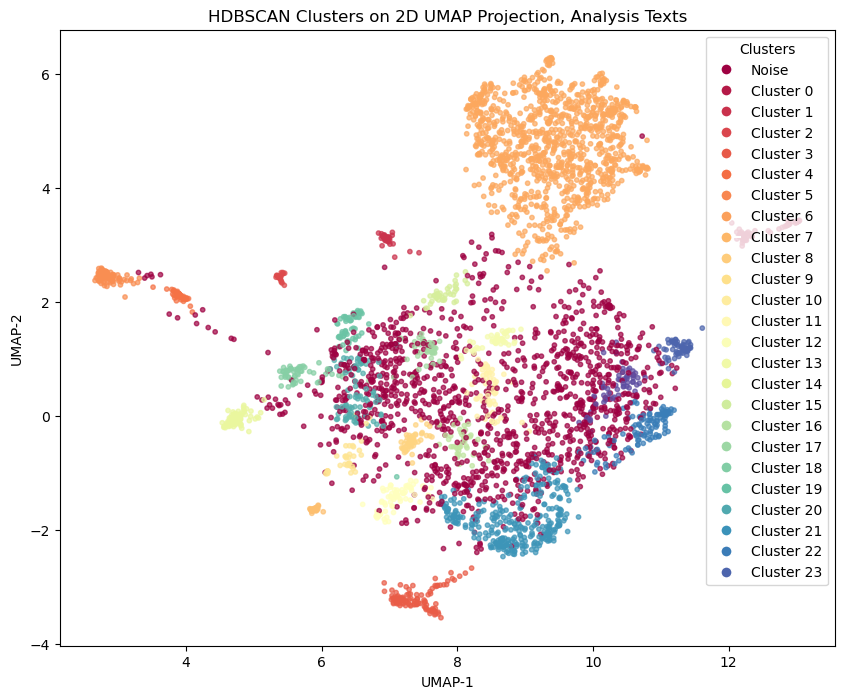

In [13]:
# Visualization part

import os
import json
from tqdm import tqdm
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt


# ----------------------------
# Step 6: 2D Visualization via UMAP
# ----------------------------
umap_2d = umap.UMAP(
    n_neighbors=50, # 120 neighbors because why not
    n_components=2,
    metric=metric,
    random_state=42
).fit_transform(embeddings)  # <-- use original embeddings, not the 20D ones

# ----------------------------
# Step 7: Plot clusters
# ----------------------------
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    umap_2d[:, 0],
    umap_2d[:, 1],
    c=cluster_labels,
    cmap='Spectral',
    s=10,
    alpha=0.7
)

plt.title("HDBSCAN Clusters on 2D UMAP Projection, Analysis Texts")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")

# Create legend only for actual clusters (exclude noise = -1)
unique_labels = sorted(set(cluster_labels))
handles = [
    plt.Line2D([], [], marker='o', color='w', label=f"Cluster {label}" if label != -1 else "Noise",
               markerfacecolor=plt.cm.Spectral(float(i) / len(unique_labels)), markersize=8)
    for i, label in enumerate(unique_labels)
]
plt.legend(handles=handles, loc="best", title="Clusters")

plt.show()

In [23]:
# ----------------------------
# Step 8: Topic Extraction via KeyBERT, from clusters directly
# ----------------------------

from keybert import KeyBERT
from collections import defaultdict, Counter

# Initialize KeyBERT with a multilingual or English model (depending on your case)
kw_model = KeyBERT(model=model)  # use the same SentenceTransformer model as embeddings

# Words to exclude from the final top keywords
banned_keywords = set(["armenia", "armenian", "armenians", "cultural", "heritage", "historical", "history"])

def extract_keywords_keybert(texts, top_k=10, per_doc=False):
    all_text = " ".join(texts)
    #for banned_word in banned_keywords:
        #all_text = all_text.replace(banned_word, "")
    keywords = kw_model.extract_keywords(
        all_text, 
        keyphrase_ngram_range=(1, 1),
        stop_words='english',
        use_maxsum=True,
        top_n=30,  # extract more so we can filter later
        nr_candidates=30
    )
    
    # Filter out unwanted keywords (case-insensitive)
    filtered = [
        kw for kw, score in keywords
        if not any(ban in kw.lower() for ban in banned_keywords)
    ]
    
    return filtered[:min(top_k, len(filtered))]

# Final output: show refined cluster topics
print("\n=== Refined Cluster Topics with KeyBERT ===\n")
for label, comments in clustered_comments_lemmas.items():
    if len(comments) < 3:
        continue  # skip very small clusters
    #comment_texts = [text for _, text in comments]
    comment_texts = comments
    keywords = extract_keywords_keybert(comment_texts, top_k=10)
    print(f"Cluster {label} ({len(comments)} comments): {', '.join(keywords)}")


=== Refined Cluster Topics with KeyBERT ===

Cluster 19 (92 comments): terminology, framing, regional, kurdistan, revisionism, propagandistic, renaming, weaponization, turkey, ermenistan
Cluster 17 (54 comments): civilization, attribution, nuance, succession, ethnogenesis, archaeological, distinction, linguistic, ayrarat, contextualize
Cluster 6 (1062 comments): perspective, weaponised, rhetoric, historiography, weaponized, context, weaponize, genocida, violence, viewpoint
Cluster 13 (84 comments): archeological, recontextualization, significant, arafat, reattribution, territory, արարատ, attribution, geopolitical, significance
Cluster 18 (57 comments): imposition, sect, renovation, narrative, connotation, centrality, theological, consecration, orthodoxy, distinctiveness
Cluster 20 (327 comments): viewpoint, region, respublikası, revision, wording, rephrase, карабах, recontextualization, az, narrative
Cluster 16 (41 comments): artak, presence, anatolia, line, erase, geographical, dimin

In [2]:
# ----------------------------
# Step 9: Compare cosine similarity of clusters to predefined categories
# ----------------------------

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Step 1: Category Definitions
categories = {
    "Terminology Manipulation": "Terminology Manipulation: swapping neutral or standard terms for loaded alternatives.",
    "Euphemism & Doublespeak": "Euphemism & Doublespeak: replacing direct language with softer or vaguer phrases to downplay or obscure meaning.",
    "Selective Omission": "Selective Omission: deleting inconvenient facts, dates, or events in order to skew the overall narrative.",
    "Selective Insertion": "Selective Insertion: adding fringe claims or one-sided anecdotes that favor a particular ideological viewpoint.",
    "Framing & Emphasis Shifts": "Framing & Emphasis Shifts: reordering sentences or re-heading sections in order to steer the reader toward a desired interpretation.",
    "Source-Biasing": "Source-Biasing: replacing reputable citations with partisan or unverifiable sources to lend spurious credibility to a claim.",
    "Citation Washing": "Citation Washing: bulk-adding citations (often low-quality or irrelevant) to create a veneer of weight without substantively improving accuracy.",
    "Semantic Drift": "Semantic Drift: subtly changing meaning via careful rewording, so that the original intent is shifted over time.",
    "Cherry-Picking Data": "Cherry-Picking Data: highlighting only supportive statistics or quotes while omitting those that run counter to the preferred narrative.",
    "Image & Media Manipulation": "Image & Media Manipulation: swapping in maps, photographs, or other media that reinforce a specific claim or perspective.",
    "Name & Label Changes": "Name & Label Changes: altering place-names or personal names to contested variants.",
    "Glorification or Vilification": "Glorification or Vilification: adding laudatory or demonizing language to portray a person, group, or event as heroic or villainous.",
    "Timeline Rewriting": "Timeline Rewriting: shifting dates or sequences of events to downplay or exaggerate accountability and causality.",
    "False Balance / Neutrality Fallacy": "False Balance / Neutrality Fallacy: presenting a false equivalence by giving weight to fringe or debunked positions.",
    "Cultural Appropriation": "Cultural Appropriation: asserting ownership of another group’s cultural heritage through framing a contested symbol as 'ours'.",
    "Revisionist Contextualization": "Revisionist Contextualization: reframing past events under a modern agenda to serve ideological ends.",
    "Appeal to Authority": "Appeal to Authority: over-quoting biased experts or official statements to lend undue legitimacy to a viewpoint."
}

category_names = list(categories.keys())
category_texts = list(categories.values())

# Step 2: Encode category definitions
model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", trust_remote_code=True)
category_embeddings = model.encode(category_texts, convert_to_tensor=True)

# Step 3: Get cluster centroids
cluster_ids = list(clustered_comments.keys())
cluster_centroids = []
for cluster_id in cluster_ids:
    idxs = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    emb_subset = np.array([embeddings[i] for i in idxs])
    centroid = np.mean(emb_subset, axis=0)
    cluster_centroids.append(centroid)

cluster_centroids = np.vstack(cluster_centroids)

# Step 4: Compute cosine similarity
similarities = cosine_similarity(cluster_centroids, category_embeddings.cpu().numpy())  # Shape: (clusters, categories)

# Step 5: Output as a DataFrame
similarity_df = pd.DataFrame(similarities, index=[f"Cluster {i}" for i in cluster_ids], columns=category_names)
print(similarity_df.round(2))

# Optional: Show top N matches for each cluster
print("\n=== Top Category Matches Per Cluster ===")
for i, row in similarity_df.iterrows():
    top = row.sort_values(ascending=False).head(5)
    print(f"{i}: {', '.join([f'{k} ({v:.2f})' for k, v in top.items()])}")

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


            Terminology Manipulation  Euphemism & Doublespeak  \
Cluster 19                      0.62                     0.59   
Cluster 17                      0.56                     0.56   
Cluster 6                       0.58                     0.58   
Cluster 13                      0.56                     0.54   
Cluster 18                      0.59                     0.58   
Cluster 20                      0.63                     0.58   
Cluster 16                      0.54                     0.55   
Cluster 14                      0.61                     0.69   
Cluster 10                      0.58                     0.54   
Cluster 0                       0.63                     0.62   
Cluster 23                      0.61                     0.58   
Cluster 11                      0.61                     0.57   
Cluster 9                       0.59                     0.56   
Cluster 15                      0.56                     0.53   
Cluster 21               

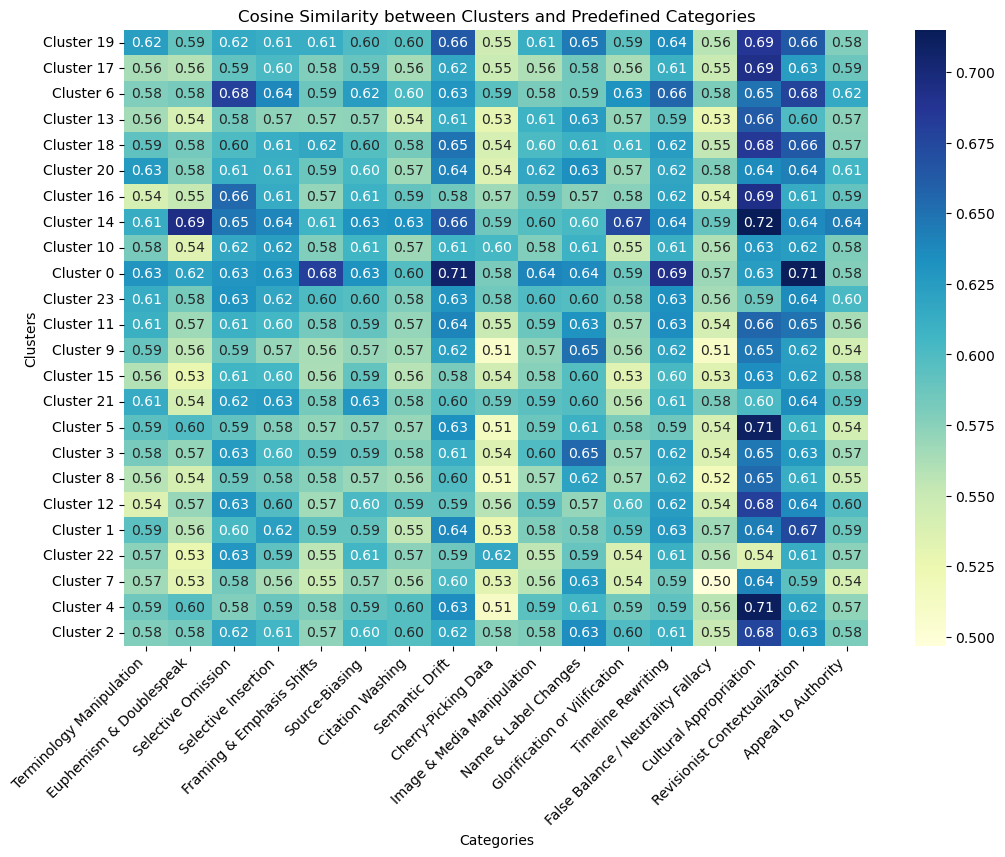

In [ ]:
# ----------------------------
#Visualize similarity heatmap
# ----------------------------
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Cosine Similarity between Clusters and Predefined Categories")
plt.xlabel("Categories")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Clusters")
plt.show()

In [10]:
# ----------------------------
# Step 10: Topic modeling across the entire corpus via BERTopic
# ----------------------------
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Use your preferred multilingual model
embedding_model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", trust_remote_code=True)

# Your preprocessed list of judgment texts
texts = comment_analysis_texts

# Initialize BERTopic with custom embedding model
topic_model = BERTopic(embedding_model=embedding_model, 
                       language="multilingual", 
                       calculate_probabilities=True, 
                       verbose=True)

topics, probs = topic_model.fit_transform(texts)

topic_info = topic_model.get_topic_info()
print(topic_info.head(10))

for topic_id in topic_info['Topic'].tolist():
    if topic_id == -1:
        continue  # Skip outliers/noise
    print(f"\nTopic {topic_id}:\n", topic_model.get_topic(topic_id))


Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
2025-11-12 13:50:55,628 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/124 [00:00<?, ?it/s]

2025-11-12 13:51:56,543 - BERTopic - Embedding - Completed ✓
2025-11-12 13:51:56,544 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-12 13:52:14,816 - BERTopic - Dimensionality - Completed ✓
2025-11-12 13:52:14,819 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-12 13:52:15,688 - BERTopic - Cluster - Completed ✓
2025-11-12 13:52:15,694 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-12 13:52:16,085 - BERTopic - Representation - Completed ✓


   Topic  Count                                        Name  \
0     -1    995                            -1_of_the_and_in   
1      0   1069                  0_genocide_the_of_armenian   
2      1    138   1_conflict_involvement_support_azerbaijan   
3      2     97               2_dish_dolma_cuisine_cultural   
4      3     86            3_ararat_mount_mountain_cultural   
5      4     70           4_lavash_cultural_origin_heritage   
6      5     70       5_casualties_killed_conflict_reported   
7      6     68                6_nagorno_karabakh_status_de   
8      7     63          7_urartu_armenians_urartian_modern   
9      8     58  8_nakhichevan_nakhchivan_cultural_armenian   

                                      Representation  \
0  [of, the, and, in, to, that, armenian, as, whi...   
1  [genocide, the, of, armenian, events, historic...   
2  [conflict, involvement, support, azerbaijan, t...   
3  [dish, dolma, cuisine, cultural, culinary, her...   
4  [ararat, mount, mountai

In [ ]:
for topic_id in topic_info['Topic'].tolist():
    if topic_id == -1:
        continue
    repr_docs = topic_model.get_representative_docs(topic_id)
    print(f"\nTopic {topic_id} Sample Docs:")
    for doc in repr_docs[:3]:
        print("-", doc)

In [ ]:
# ----------------------------
# Step 11: Topic modeling for individual clusters via BERTopic
# ----------------------------
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from collections import defaultdict
import numpy as np

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stopwords = set([
    "armenia", "armenian", "armenians", "cultural", "heritage", "historical", "history"
])

def apply_topic_modeling_per_cluster(clustered_comments, embedding_model, top_n_words=15):
    for label, comment_tuples in clustered_comments.items():
        if len(comment_tuples) < 10:
            continue  # Skip small clusters

        print(f"\n--- Topics in Cluster {label} ({len(comment_tuples)} comments) ---")

        texts = [text for _, text in comment_tuples]

        # Get embeddings
        embeddings = embedding_model.encode(texts, show_progress_bar=False)

        # Custom vectorizer to filter out domain-specific stopwords
        vectorizer_model = CountVectorizer(
            stop_words=list(ENGLISH_STOP_WORDS.union(custom_stopwords)),
            ngram_range=(1, 2),
            min_df=1
        )

        # Run BERTopic
        topic_model = BERTopic(
            embedding_model=embedding_model,
            vectorizer_model=vectorizer_model,
            calculate_probabilities=False,
            verbose=False
        )
        topics, probs = topic_model.fit_transform(texts, embeddings)

        # Get top topic descriptions
        topic_info = topic_model.get_topic_info()
        for row in topic_info.itertuples():
            if row.Topic == -1:
                continue  # Skip outliers
            words = topic_model.get_topic(row.Topic)
            #filtered_words = []
            #for word in words:
                #if word[0] not in custom_stopwords:
                    #filtered_words.append(word)
            filtered_words = words
            keywords = ", ".join([w for w, _ in filtered_words[:top_n_words]])
            print(f"  Topic {row.Topic} ({row.Count} docs): {keywords}")


apply_topic_modeling_per_cluster(clustered_comments, model)


--- Topics in Cluster 19 (92 comments) ---
  Topic 0 (43 docs): narrative, revision, shift, context, claims, identity, term, significant, removal, region
  Topic 1 (24 docs): identity, language, shift, narrative, attempt, context, linguistic, turkish, narratives, languages

--- Topics in Cluster 17 (54 comments) ---
  Topic 0 (29 docs): narrative, revision, urartian, claims, claim, context, removal, shift, urartians, phrase
  Topic 1 (17 docs): urartu, claims, narrative, identity, use, aligns, connection, framing, attempt, direct

--- Topics in Cluster 6 (1062 comments) ---
  Topic 0 (163 docs): genocide, narrative, added, line, recognition, term, aligns, framing, perspective, seen
  Topic 1 (124 docs): genocide, narrative, events, recognition, revision, phrase, turkish, significant, turkey, shift
  Topic 2 (74 docs): genocide, removal, narrative, section, content, erase, absence, critical, attempt, section titled
  Topic 3 (72 docs): genocide, term, shift, change, revision, recogniti